# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
#from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально используйте:
#
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    return (np.reshape(coin(precision * np.prod(size)), (precision, np.prod(size))) *
            2. ** np.arange(-precision, 0, 1).reshape(precision, 1)).sum(axis=0).reshape(size)


def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)  # сетка для построения графика
    sample = uniform(size=size)

    plt.figure(figsize=(12, 5))
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4)
    plt.hist(sample, bins=10, density=True, alpha=0.4,
             label='Гистограмма случайной величины')
    plt.plot(grid, uniform_pdf(grid), color='red', lw=5,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=20)
    plt.xlim(-0.25, 1.25)
    plt.legend(fontsize=14, loc=1)
    plt.show()
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(12, 5))

    plt.suptitle('Different precisions')
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1).title.set_text('Precision: ' + str(precision))

        plt.scatter(
            uniform(size=size, precision=precision),
            y=np.zeros(size),
            alpha=0.4
        )

        plt.yticks([])
        if i < 4:
            plt.xticks([])
    plt.show()
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    u = uniform(size, precision)
    v = uniform(size, precision)
    return np.cos(2 * np.pi * u) * np.sqrt((-2) * np.log(v)) * scale + loc


def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)  # сетка для построения графика
    sample = normal(size=size)

    plt.figure(figsize=(12, 5))
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4)
    plt.hist(sample, bins=30, density=True, alpha=0.4,
             label='Гистограмма случайной величины')
    plt.plot(grid, norm_pdf(grid), color='red', lw=5,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
    plt.xlim(-3, 3)
    plt.legend(fontsize=14, loc=1)
    plt.show()
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    return np.log(1 / (1 - uniform(size, precision))) / lambd


def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)  # сетка для построения графика
    sample = expon(size=size)

    plt.figure(figsize=(12, 5))
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4)
    plt.hist(sample, bins=30, density=True, alpha=0.4,
             label='Гистограмма случайной величины')
    plt.plot(grid, expon_pdf(grid), color='red', lw=5,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина expon', fontsize=20)
    plt.xlim(-0.5, 5)
    plt.legend(fontsize=14, loc=1)
    plt.show()
    return plt.gcf()

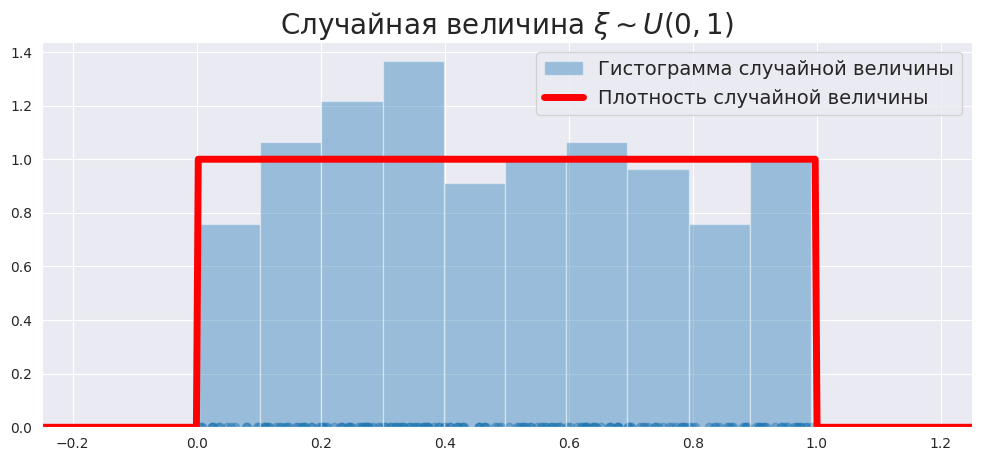

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
plot_uniform_density()

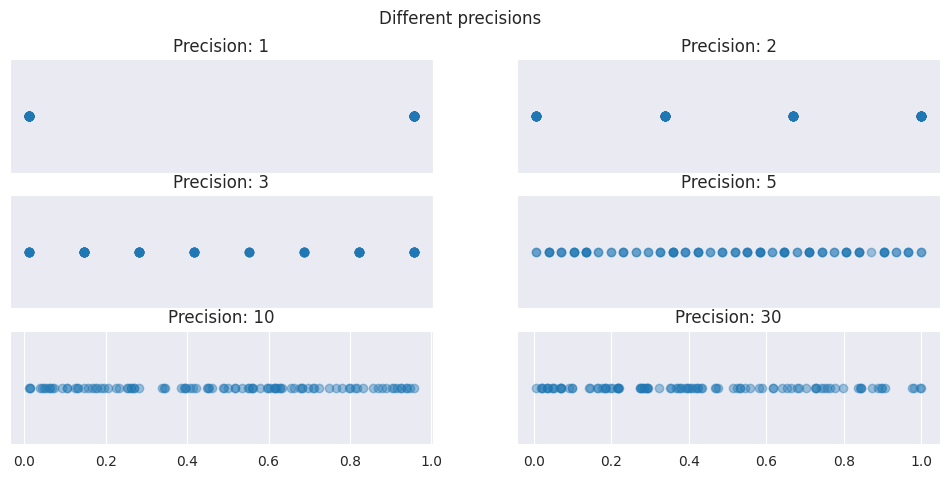

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
plot_uniform_different_precision()

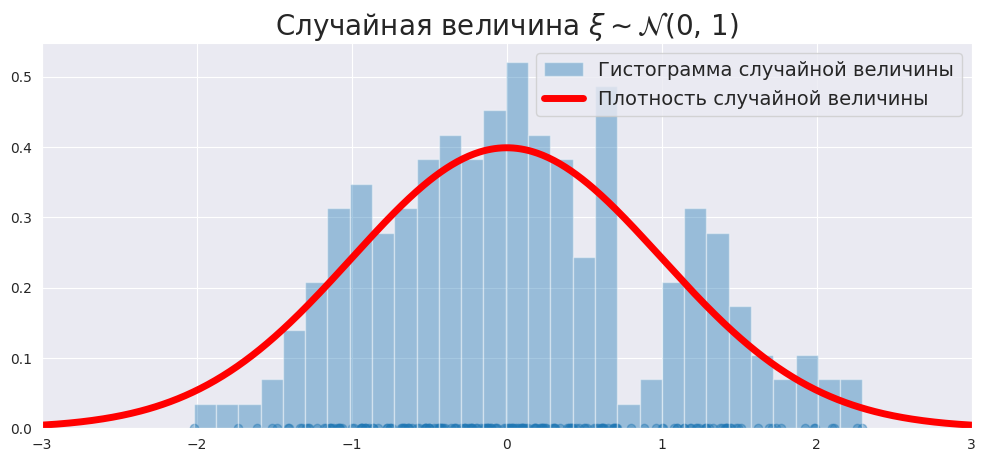

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
plot_normal_density()

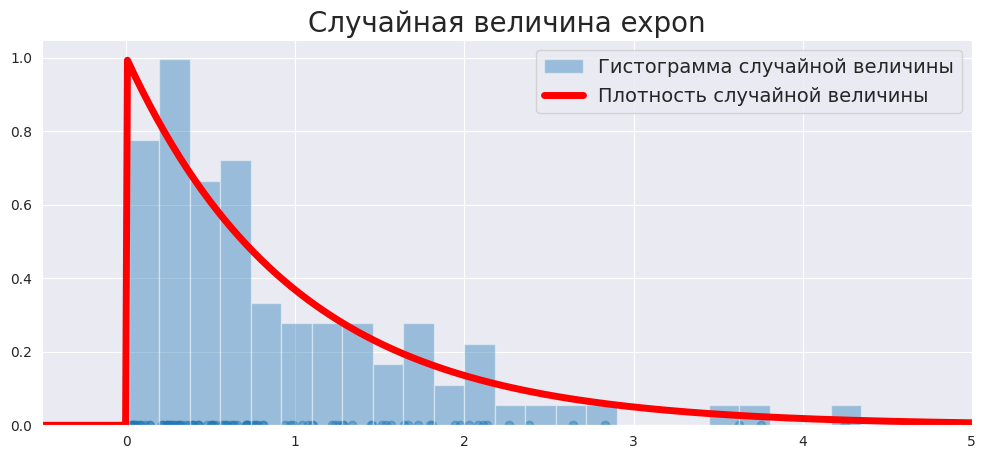

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
plot_expon_density()

**Выводы:**

При увеличении precision, распределение становится 'менее дискретным'. Представленные распределения можно получить имея 'монетку'.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

**Вывод:**

...

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [30]:
data = sps.bernoulli(p=0.5).rvs(size=(500, 10000))
data = np.cumsum(np.flip(data, 0), axis=1) / (np.arange(10000) + 1)
f = np.abs(data - 0.5).sum(axis=0) / 500

np.where(f > 0.02, 1, 0).sum()

431

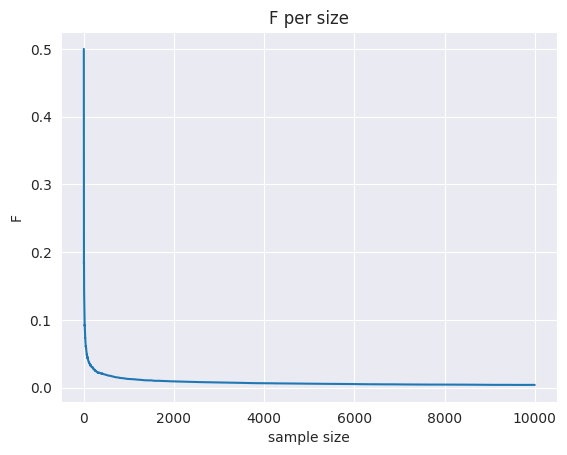

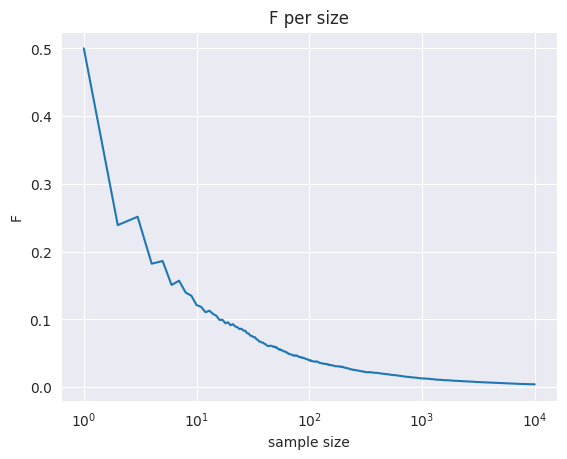

In [31]:
plt.plot(np.arange(10000) + 1, f)
plt.title('F per size')
plt.xlabel('sample size')
plt.ylabel('F')
plt.show()

plt.plot(np.arange(10000) + 1, f)
plt.title('F per size')
plt.xlabel('sample size')
plt.ylabel('F')
plt.xscale(value='log')
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Text(0, 0.5, 'sample size')

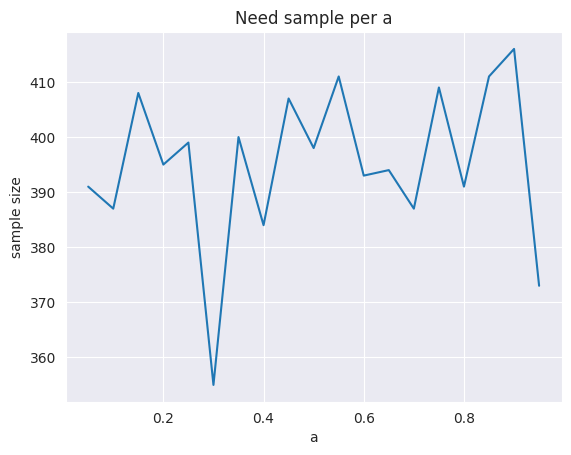

In [36]:
gr = []
for a in range(5, 100, 5):
    a /= 100
    data = sps.bernoulli(p=0.5).rvs(size=(500, 10000))
    data = np.cumsum(np.flip(data, 0), axis=1) / (np.arange(10000) + 1)
    f = np.abs(data - 0.5).sum(axis=0) / 500

    gr.append(np.where(f > 0.02, 1, 0).sum())
    
plt.plot(np.arange(5, 100, 5) / 100, gr)
plt.title('Need sample per a')
plt.xlabel('a')
plt.ylabel('sample size')

**Выводы:**

...